#### read dataset

In [424]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import os

In [425]:
df = pd.read_csv("dataset\stroke.csv")
print("Dataset Loaded!")
df = df.drop("id", axis=1)
df.head()

Dataset Loaded!


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [427]:
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [428]:
df = df.dropna()
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [430]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    le = LabelEncoder()
    le.fit(df[col])
    encoders[col] = le

fitur_train = df.drop('stroke', axis=1).columns.tolist()

# Simpan ini agar nanti bisa dipakai di API
import pickle
with open("models/encoders.pkl", "wb") as f:
    pickle.dump({"columns": fitur_train, "encoders": encoders}, f)

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [431]:
skew_values = df.skew()
print("Skewness tiap kolom:")
print(skew_values)

Skewness tiap kolom:
gender               0.370949
age                 -0.119070
hypertension         2.826791
heart_disease        4.155030
ever_married        -0.641543
work_type           -0.302072
Residence_type      -0.028938
avg_glucose_level    1.614026
bmi                  1.055340
smoking_status      -0.048951
stroke               4.532666
dtype: float64


In [432]:
df["stroke"].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

#### var inden dan depen

In [433]:
x = df.iloc[:,1 :-1]
y = df.iloc[:, -1]


y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [434]:
x

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,67.0,0,1,1,2,1,228.69,36.6,1
2,80.0,0,1,1,2,0,105.92,32.5,2
3,49.0,0,0,1,2,1,171.23,34.4,3
4,79.0,1,0,1,3,0,174.12,24.0,2
5,81.0,0,0,1,2,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,0,4,0,103.08,18.6,0
5106,81.0,0,0,1,3,1,125.20,40.0,2
5107,35.0,0,0,1,3,0,82.99,30.6,2
5108,51.0,0,0,1,2,0,166.29,25.6,1


#### split data test dan train

In [435]:
# x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42 , shuffle=True, stratify=y)
# y_test
from imblearn.over_sampling import SMOTE

# Split test set seimbang
kelas_0 = df[df['stroke'] == 0]
kelas_1 = df[df['stroke'] == 1]

n_test = 50
test_0 = kelas_0.sample(n=n_test, random_state=42)
test_1 = kelas_1.sample(n=n_test, random_state=42)
test_set = pd.concat([test_0, test_1])

train_set = df.drop(test_set.index)

# Pisahkan fitur dan stroke
x_train = train_set.drop('stroke', axis=1)
y_train = train_set['stroke']
x_test = test_set.drop('stroke', axis=1)
y_test = test_set['stroke']

# SMOTE pada train set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)


In [436]:
y_test

4757    0
2774    0
609     0
1297    0
1802    0
       ..
85      1
191     1
103     1
119     1
45      1
Name: stroke, Length: 100, dtype: int64

In [437]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1


In [438]:
X_train_res

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.000000,0,1,1,2,1,228.690000,36.600000,1
1,1,80.000000,0,1,1,2,0,105.920000,32.500000,2
2,0,49.000000,0,0,1,2,1,171.230000,34.400000,3
3,0,79.000000,1,0,1,3,0,174.120000,24.000000,2
4,1,81.000000,0,0,1,2,1,186.210000,29.000000,1
...,...,...,...,...,...,...,...,...,...,...
9295,1,80.035080,0,0,1,2,0,187.784750,28.614032,1
9296,0,67.813264,1,0,1,2,0,62.908946,24.893368,2
9297,0,80.000000,1,0,1,3,0,71.092804,27.863886,1
9298,0,38.556144,0,0,0,2,1,82.813898,25.279131,1


#### modeling

In [439]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

print("Training selesai!")

Training selesai!


#### evaluasi


=== EVALUASI MODEL NAIVE BAYES ===
Akurasi: 0.58

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.98      0.70        50
           1       0.90      0.18      0.30        50

    accuracy                           0.58       100
   macro avg       0.72      0.58      0.50       100
weighted avg       0.72      0.58      0.50       100



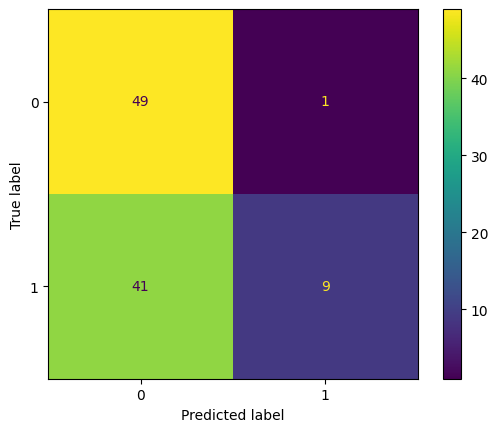

In [440]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(x_test)

print("\n=== EVALUASI MODEL NAIVE BAYES ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


#### simpan pohon ke pdf

#### simpan model

In [441]:

with open('models/random_forest.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("model dan scaler berhasil disimpan")

model dan scaler berhasil disimpan
